<a href="https://colab.research.google.com/github/farooqhasny/ERT3PY/blob/main/ERT3FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# import scipy.fftpack
import sys
import time

In [32]:
# Number of samplepoints
Fs = 100            # sampling frequency
Ts = 2              # sample duration
N = Fs * Ts         # total samples
T = 1.0 / N         # sample spacing
t0 = time.time()
x = np.linspace(0.0, N*T, N)
y = np.sin(30.0 * 2.0*np.pi*x)+ 0.5*np.sin(80.0 * 2.0*np.pi*x)+ 0.7*np.sin(90.0 * 2.0*np.pi*x)

xf  (100,) 200 (200,)


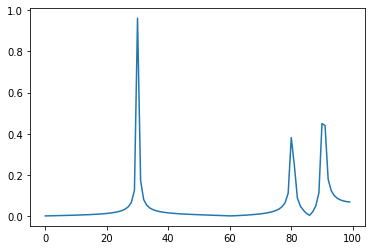

20.768922567367554  Sec


In [34]:
t1 = time.time()
yf = np.fft.fft(y)
xf = np.linspace(0.0, 1.0//(2.0*T), N//2)
fig, ax = plt.subplots()
# ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
print("xf ",xf.shape,N,yf.shape)
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

print( t1-t0," Sec")